In [39]:
import math
import pickle
import networkx as nx

In [40]:
exp = 'epi_f100_maf0.4_0.1'

In [36]:
objects = []
with (open('pipeline/lcsdive/'+exp+'/output/lcs_dive/Composite/rulepop/networkpickle', 'rb')) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break

In [37]:
obj = objects[0]

In [38]:
(acc_spec_dict, edge_list, weight_list, pos) = obj

In [41]:
G = nx.Graph()
for i in range(len(edge_list)):
    G.add_edge(edge_list[i][0], edge_list[i][1], weight=weight_list[i])
pos = nx.spring_layout(G, k=1)

{'M0P5': Text(0.0843282704379074, 0.01689954119254374, 'M0P5'),
 'M0P6': Text(0.01186532865299999, 0.0620644502170611, 'M0P6'),
 'N95': Text(0.013977560473888368, 0.11778466733729419, 'N95'),
 'N9': Text(0.18936576767326177, 0.04519992775506705, 'N9'),
 'N20': Text(0.2996145417310666, 0.06313557436765742, 'N20'),
 'N0': Text(0.12718440162973993, 0.102976368841836, 'N0'),
 'N11': Text(-0.0674416678075017, 0.05610782898104099, 'N11'),
 'N7': Text(0.005487619985191711, 0.005894450019913008, 'N7'),
 'N84': Text(0.0784261569405952, 0.14464286063374598, 'N84'),
 'N21': Text(-0.031699175495731945, -0.08314331850648755, 'N21'),
 'N22': Text(0.22134741712943834, 0.12902907831440721, 'N22'),
 'N96': Text(0.3501839723297104, 0.0051470916561950275, 'N96'),
 'N65': Text(0.05289019753073449, -0.04408333889709052, 'N65'),
 'N3': Text(0.12738603024130132, 0.22729300114983295, 'N3'),
 'N90': Text(0.2444417783609232, -0.02382665134921994, 'N90'),
 'N5': Text(0.13339238234192535, -0.1371396989228597, 'N5

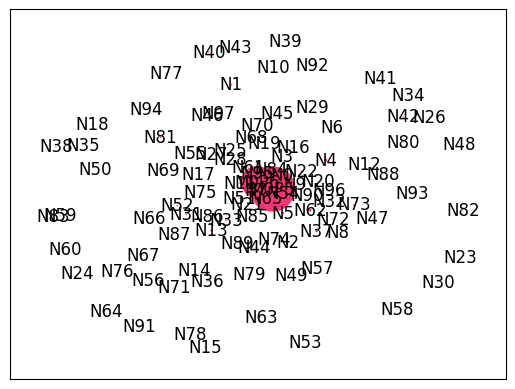

In [42]:
max_node_value = max(acc_spec_dict.values())
for i in acc_spec_dict:
    acc_spec_dict[i] = math.pow(acc_spec_dict[i] / max_node_value, 3) * 1000  # Cubic Node Size Function

max_weight_value = max(weight_list)
for i in range(len(weight_list)):
    weight_list[i] = math.pow(weight_list[i] / max_weight_value, 3) * 10  # Cubic Weight Function

nx.draw_networkx_nodes(G, pos=pos, nodelist=acc_spec_dict.keys(), node_size=[v * 1 for v in acc_spec_dict.values()], node_color='#FF3377')
nx.draw_networkx_edges(G, pos=pos, edge_color='#E0B8FF', edgelist=edge_list, width=[v * 1 for v in weight_list])
nx.draw_networkx_labels(G, pos=pos)

In [43]:
nx.write_gexf(G, 'output/Figure6.gexf')

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.
